### Creating and Persisting an ML Model

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/student-mat.csv', sep=';')

In [2]:
display(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Summary of the data

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

Create a subset of features as an example.

In [7]:
include = ['address','traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities',
           'higher', 'internet', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 
           'G1', 'G2', 'G3']
df.drop(columns=df.columns.difference(include), inplace=True)  

In [8]:
df.columns

Index(['address', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'higher', 'internet', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
df.head()

,address,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,U,2,2,0,yes,no,no,no,yes,no,3,4,1,1,3,6,5,6,6
1,U,1,2,0,no,yes,no,no,yes,yes,3,3,1,1,3,4,5,5,6
2,U,1,2,3,yes,no,yes,no,yes,yes,3,2,2,3,3,10,7,8,10
3,U,1,3,0,no,yes,yes,yes,yes,yes,2,2,1,1,5,2,15,14,15
4,U,1,2,0,no,yes,yes,no,yes,no,3,2,1,2,5,4,6,10,10


The goal is to predict the quality of the student. We will build a predictor based on the final grade (G3).
Becasue we are trying to find quality students. In this model we define a quality student as one who achieves a final grade of 15 or higher. 

In [10]:
df['qual_student'] = np.where(df['G3']>=15, 1, 0)

In [11]:
df.describe()

,traveltime,studytime,failures,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,qual_student
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.448101,2.035443,0.334177,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.184810
std,0.697505,0.839240,0.743651,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.388636
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,1.000000,2.000000,0.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,0.000000
75%,2.000000,2.000000,0.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,0.000000
max,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000


Drop the G3 score

In [12]:
include = ['address','traveltime','studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
           'higher', 'internet', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 
           'G1', 'G2', 'qual_student']
df.drop(columns=df.columns.difference(include), inplace=True) 

In [13]:
df.head()

,address,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,freetime,goout,Dalc,Walc,health,absences,G1,G2,qual_student
0,U,2,2,0,yes,no,no,no,yes,no,3,4,1,1,3,6,5,6,0
1,U,1,2,0,no,yes,no,no,yes,yes,3,3,1,1,3,4,5,5,0
2,U,1,2,3,yes,no,yes,no,yes,yes,3,2,2,3,3,10,7,8,0
3,U,1,3,0,no,yes,yes,yes,yes,yes,2,2,1,1,5,2,15,14,1
4,U,1,2,0,no,yes,yes,no,yes,no,3,2,1,2,5,4,6,10,0


<AxesSubplot:xlabel='internet,qual_student'>

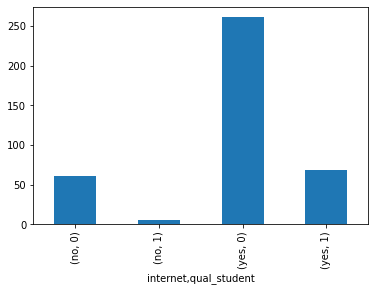

In [14]:
df.groupby(['internet','qual_student']).count().address.plot(kind='bar')

In [15]:
#df.replace('yes',1,inplace = True)    
#df.replace('no',0,inplace = True)

Import scikit-learn and build a random forest classifer

In [16]:
from sklearn import preprocessing
dependent_variable = 'qual_student'
X = df[['studytime','goout', 'Dalc', 'absences', 'G1', 'G2']]
X = pd.get_dummies(X)
Y = df[dependent_variable]

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import sklearn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
clf = RandomForestClassifier(criterion='gini', 
                             n_estimators=200,
                             max_depth=7,
                             min_samples_split=5,
                             min_samples_leaf=3,
                             max_features='auto',
                             oob_score=True,
                             random_state=42,
                             n_jobs=-1,
                             verbose=1)
clf.fit(X_train.values, Y_train.values)
pred = clf.predict(X_test.values)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [18]:
print(X_test, Y_test)

     studytime  goout  Dalc  absences  G1  G2
313          2      2     1        22  13  10
201          2      3     1         6   8  10
117          1      2     1         0  13  14
23           2      4     2         0  13  13
330          4      5     2         2   9   8
..         ...    ...   ...       ...  ..  ..
138          2      4     1         0  14  12
55           2      4     1         8   8   9
393          1      1     3         0  11  12
178          1      3     3        10  10   8
160          1      2     2         0   7   6

[79 rows x 6 columns] 313    0
201    0
117    0
23     0
330    0
      ..
138    0
55     0
393    0
178    0
160    0
Name: qual_student, Length: 79, dtype: int64


In [19]:
acc_train = clf.score(X_train.values, Y_train.values)
print("Train Accuracy:", acc_train)
acc_test = clf.score(X_test.values, Y_test.values)
print("Test Accuracy:", acc_test)

Train Accuracy: 0.9778481012658228
Test Accuracy: 0.9873417721518988


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [20]:
precision = precision_score(Y_test.values, pred, average = 'weighted')
recall = recall_score(Y_test.values, pred, average = 'weighted')
rfc_cv_score = cross_val_score(clf, X.values, Y.values, cv=10, scoring='roc_auc')
print("Precision:", precision)
print("Recall:", recall)
print("Mean AUC Score - Random Forest: ",rfc_cv_score.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

Precision: 0.9883966244725738
Recall: 0.9873417721518988
Mean AUC Score - Random Forest:  0.993956304112554


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [21]:
import joblib
# modify the file path to where you want to save the model
joblib.dump(clf, 'dockerfile/apps/model1.pkl')

['dockerfile/apps/model1.pkl']